In [32]:
########################### Libraries ##################################
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import astropy
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from astropy.coordinates.angle_utilities import hms_to_degrees, dms_to_degrees
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
import re
import json
from collections import Counter
from operator import itemgetter
import scipy
from scipy.signal import argrelextrema
from astroML.time_series import lomb_scargle
from gatspy.periodic import LombScargleFast
from os import path
import matplotlib.backends.backend_pdf
import matplotlib.dates as mdates
import requests
import urllib
import os
from os import walk
import shutil

In [1]:
import pandas as pd
df=pd.read_csv('2iddist.csv')

Text(0, 0.5, 'Number of objects')

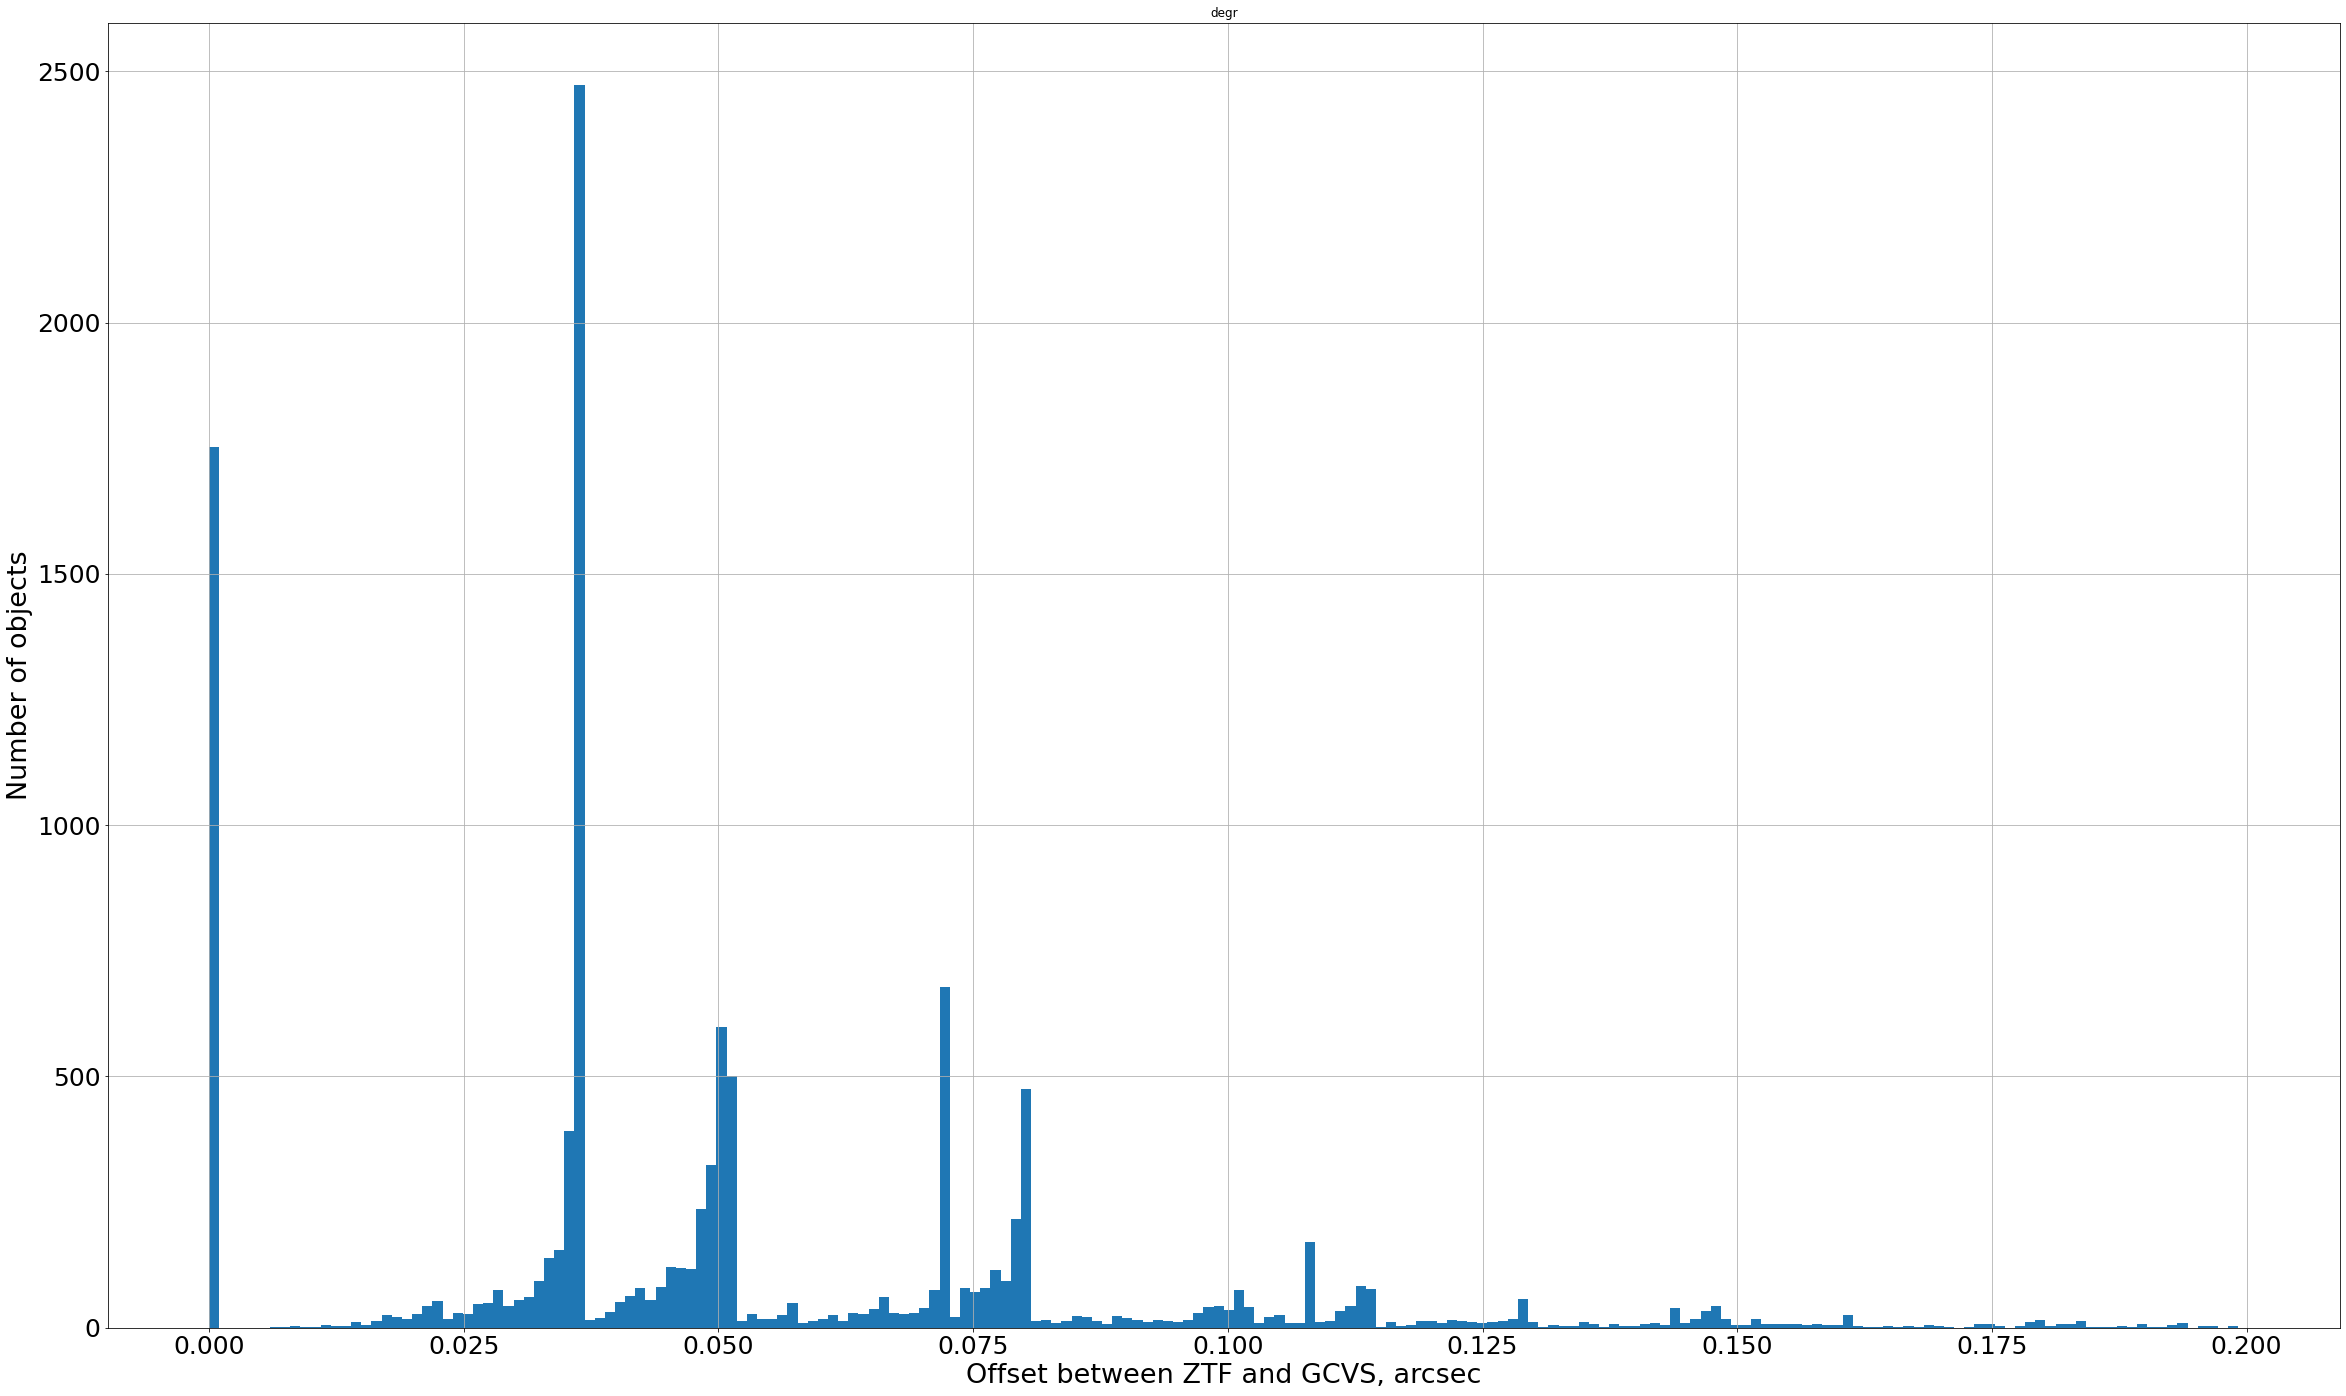

In [35]:
import pylab as pl
df[df['degr']<0.2].hist(bins=200,figsize=(40,24),xlabelsize=25,ylabelsize=25)
pl.xlabel("Offset between ZTF and GCVS, arcsec",size=27)
pl.ylabel("Number of objects",size=27)

### Define n- number of requests to server

In [2]:
first_gcvs_rows=100 # limit the number of downloads by this variable

In [5]:
#ОКПЗ
# We are storing url of dataset
# We are creating a requests variable with the above url
# url = 'http://www.sai.msu.su/gcvs/gcvs/gcvs5/gcvs5.txt'

#for creation:
# directory = "catalogs"
# subdirectory1='1id'
# subdirectory2='2id'
# subdirectory4='4id'
# subdirectoryres='overall'

path1 = os.path.join(directory, subdirectory1) 
path2 = os.path.join(directory, subdirectory2) 
path4 = os.path.join(directory, subdirectory4) 
pathres= os.path.join(directory, subdirectoryres) 


#for creation:
# os.makedirs('catalogs') 
# os.makedirs(path1)
# os.makedirs(path2)
# os.makedirs(path4)
# os.makedirs(pathres)


# # url_summ= 'https://drive.google.com/file/d/1oMWIFi3YKaqlu7JTA3GajON75T7v-x0J/view?usp=sharing'
# url_zg='https://drive.google.com/file/d/1hxM-43k23p7zvX_srnVhm-LspuaDz-VC/view?usp=sharing'
# url_zr='https://drive.google.com/file/d/1Jm9FdLzPm0D7Che0zGjisuVoXB5wPJib/view?usp=sharing
# url_gcvs='https://drive.google.com/u/0/uc?id=15QJaqEAMJRFWXn22GaNybYisLXddj69s&export=download'
# myfile = requests.get(url_gcvs)
# with open(path1 +'gcvs.txt', 'wb') as f:
#     f.write(myfile.content)

# open(path1 +'gcvs.txt', 'wb').write(myfile.content)

In [4]:
data = astropy.io.ascii.read('gcvs5.txt', data_start=2, delimiter='|',guess='txt')
data = data.to_pandas()
Max_mag=data['Max'].tolist()
Min_mag=data['Min I'].tolist()

In [5]:
# name=datalistt[39]# save strange nan?
for i in range(len(Min_mag)):
    try:
        if Min_mag[i][0]=='<':
            Min_mag[i]=Min_mag[i][2:]
        if Min_mag[i][-1]==':':
            Min_mag[i]=Min_mag[i][:4]
        if Min_mag[i][0]=='(':
            Min_mag[i]=100
    except:
        1==1
#         print(i)
        
for i in range(len(Max_mag)):
    try:
        if Max_mag[i]==Max_mag[39]:
            Max_mag[i]=0
        if Max_mag[i][0]=='|':
            Max_mag[i]=Max_mag[1][1:]
    except:
        1==1
#         print(i) 

In [6]:
data['index']=data.index
i=0
k=0
index=[]
for i in range(len(Min_mag)):
    try:
        if float(Min_mag[i])<=10:
            index.append(i)
    except:
        print(1)
data=data.drop(index,axis=0)     
data=data.reset_index()        
data.shape

1
1


(48549, 16)

In [7]:
data = data[['J2000.0', 'Type','GCVS']]
data.Type = data.Type.map(lambda item: re.sub(':', '', str(item) ) if str(item).endswith(':') else str(item) )
data.rename(columns={'J2000.0':'coord'}, inplace=True)
data.drop(index=data[data.coord.map(lambda x: type(x) is not str )].index.values.tolist(), inplace=True)
data = data[ data.coord.map(lambda x: len(str(x)) == 19 ) ]
data['ra'] = data.coord.map(lambda x: x[:9])
data['dec'] = data.coord.map(lambda x: x[9:])
data.dec = data.dec.map(lambda x: x.replace(' ', '') )
data = data[ (data.dec.map(lambda x: x.startswith('+')) | data.dec.map(lambda x: x.startswith('-')) ) & data.dec.map(lambda x: len(x) == 9 ) ]
data.reset_index(drop=True, inplace=True)
data.ra = data.ra.map(lambda x: hms_to_degrees(float(x[:2]), float(x[2:4]), float(x[4:])) )
data.dec = data.dec.map(lambda x: dms_to_degrees(float(x[:3]), float(x[3:5]), float(x[5:])))

In [10]:
# data1=data[:first_gcvs_rows]# Для супербыстрой загрузки с сервера
data1=data
data1.iterrows()
print(data1.shape)
for i in range(data1.shape[0]):
    data1['ra'][i]=round(data1['ra'][i],3)
data1.head()

(48173, 5)


C:\Users\rtut6\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,coord,Type,GCVS,ra,dec
0,002401.95 +383437.3,M,R And *,6.008,38.577028
1,004243.1 +411605.0,SNI,S And *,10.680,41.268056
2,002223.15 +265945.8,M,T And,5.596,26.996056
3,011529.70 +404308.4,M,U And,18.874,40.719000
4,005006.28 +353910.1,M,V And,12.526,35.652806


In [11]:
i=0
for item in data1.iterrows():
    try:
    
        resp = requests.get('http://db.ztf.snad.space/api/v1/circle/full/json?ra={ra}&dec={dec}&radius_arcsec={r}'.format(ra=item[1].ra, 
                                                                                                                          dec=item[1].dec, 
                                                                                                                          r=1.5)) 
        res = resp.json()
        for obj in res.keys():
            res[obj]['meta']['Type']=item[1]['Type']
        i=i+1
        if len(res.keys())==1:
            pathname=os.path.join(path1,str(i)+".txt")
            with open(pathname, 'w') as f:
                json.dump(res, f)

        if len(res.keys())==2:
            pathname=os.path.join(path2,str(i)+".txt")
            with open(pathname, 'w') as f:
                json.dump(res, f) 

        if len(res.keys())==4:
            pathname=os.path.join(path4,str(i)+".txt")
            with open(pathname, 'w') as f:
                json.dump(res, f)  

            if i%1000==0:
                print(i)
    except:
        print('error')

error
error
error
error
error
9000
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

In [6]:
names1 = []
for (dirpath, dirnames, filenames) in walk(path1):
    names1.extend(filenames)
    break
names2 = []
for (dirpath, dirnames, filenames) in walk(path2):
    names2.extend(filenames)
    break 
names4 = []
mypath4=path4 # first (1) or second (2) folder
for (dirpath, dirnames, filenames) in walk(mypath4):
    names4.extend(filenames)
    break
    
for i in range(len(names1)):
    try:
        names1[i]=names1[i][:-4]
    except:
        print('1')
        
for i in range(len(names2)):
    try:
        names2[i]=names2[i][:-4]
    except:
        print('1')
        
for i in range(len(names4)):
    try:
        names4[i]=names4[i][:-4]
    except:
        print('1')

In [7]:
names1

['10',
 '104',
 '10406',
 '10413',
 '10422',
 '10423',
 '10424',
 '10426',
 '10441',
 '10444',
 '10453',
 '10454',
 '10457',
 '10458',
 '10464',
 '10465',
 '10470',
 '10471',
 '10477',
 '10487',
 '10490',
 '10495',
 '105',
 '10508',
 '10520',
 '10545',
 '10546',
 '10554',
 '10588',
 '10594',
 '10603',
 '10606',
 '10607',
 '10608',
 '10609',
 '10612',
 '10613',
 '10616',
 '10630',
 '10635',
 '10636',
 '10643',
 '10647',
 '10651',
 '10652',
 '10654',
 '10659',
 '10664',
 '10685',
 '10687',
 '10693',
 '10702',
 '10713',
 '10715',
 '10719',
 '10733',
 '10743',
 '10749',
 '10750',
 '10754',
 '10755',
 '10758',
 '10761',
 '10762',
 '10764',
 '10771',
 '10772',
 '10784',
 '10787',
 '10788',
 '10789',
 '10792',
 '10794',
 '10802',
 '10806',
 '10807',
 '10808',
 '10810',
 '10811',
 '10812',
 '10814',
 '10816',
 '10817',
 '10820',
 '10821',
 '10823',
 '10824',
 '10828',
 '10829',
 '10830',
 '10839',
 '10840',
 '10841',
 '10843',
 '10844',
 '10848',
 '10849',
 '10850',
 '10852',
 '10855',
 '10857

In [16]:
for item in names1:
    copypath=os.path.join(path1,item+".txt")
    shutil.copy(copypath,pathres)
for item in names2:
    copypath=os.path.join(path2,item+".txt")
    shutil.copy(copypath,pathres)
for item in names4:
    copypath=os.path.join(path4,item+".txt")
    shutil.copy(copypath,pathres)

In [8]:
names1

['10',
 '104',
 '10406',
 '10413',
 '10422',
 '10423',
 '10424',
 '10426',
 '10441',
 '10444',
 '10453',
 '10454',
 '10457',
 '10458',
 '10464',
 '10465',
 '10470',
 '10471',
 '10477',
 '10487',
 '10490',
 '10495',
 '105',
 '10508',
 '10520',
 '10545',
 '10546',
 '10554',
 '10588',
 '10594',
 '10603',
 '10606',
 '10607',
 '10608',
 '10609',
 '10612',
 '10613',
 '10616',
 '10630',
 '10635',
 '10636',
 '10643',
 '10647',
 '10651',
 '10652',
 '10654',
 '10659',
 '10664',
 '10685',
 '10687',
 '10693',
 '10702',
 '10713',
 '10715',
 '10719',
 '10733',
 '10743',
 '10749',
 '10750',
 '10754',
 '10755',
 '10758',
 '10761',
 '10762',
 '10764',
 '10771',
 '10772',
 '10784',
 '10787',
 '10788',
 '10789',
 '10792',
 '10794',
 '10802',
 '10806',
 '10807',
 '10808',
 '10810',
 '10811',
 '10812',
 '10814',
 '10816',
 '10817',
 '10820',
 '10821',
 '10823',
 '10824',
 '10828',
 '10829',
 '10830',
 '10839',
 '10840',
 '10841',
 '10843',
 '10844',
 '10848',
 '10849',
 '10850',
 '10852',
 '10855',
 '10857

In [ ]:
def getdata(names,path,df,i,filter1):
    for item in names:
        pathname=os.path.join(path,item+".txt")
        with open(pathname) as f: 
            res = f.read()
        res=json.loads(res)
    #     temp=0
        for obj in res.keys():
            if res[obj]['meta']['filter']==filter1:
                df['ra'][i]=round(res[obj]['meta']['coord']['ra'],3)
                df['dec'][i]=res[obj]['meta']['coord']['dec']
                df['Nobs'][i]=res[obj]['meta']['nobs']
                df['filter'][i]=res[obj]['meta']['filter']
                df['Name'][i]=item
                df['Type'][i]=res[obj]['meta']['Type']
                i=i+1
    return df,i           


def getdata_short(res,df,i,item):
    for obj in res.keys():
                    df['ra'][i]=round(res[obj]['meta']['coord']['ra'],3)
                    df['dec'][i]=res[obj]['meta']['coord']['dec']
                    df['Nobs'][i]=res[obj]['meta']['nobs']
                    df['filter'][i]=res[obj]['meta']['filter']
                    df['Name'][i]=item
                    df['Type'][i]=res[obj]['meta']['Type']
                    i=i+1
    return df,i


def homogen_summ(df,hold,data1):
    i=0
    types=['zg','zr']
    for item in names2:
        try:
            pathname=os.path.join(path2,item+".txt")
            with open(pathname) as f:
                res = f.read()
        except:
            print('no')
        res=json.loads(res)
        
        for obj in res.keys():
            if min(res[obj]['meta']['nobs'],res[obj]['meta']['nobs'])>hold:
                df,i=getdata_short(res,df,i,item)
                
    for item in names4:
        try:
            pathname=os.path.join(path4,item+".txt")
            with open(pathname) as f:
                res = f.read()
        except:
            print('no') 
            
        res=json.loads(res)
        
        zg=[]
        zr=[]
        for obj in res.keys():
            if res[obj]['meta']['filter']=='zg':
                zg.append(res[obj]['meta']['nobs'])
            if res[obj]['meta']['filter']=='zr':
                zr.append(res[obj]['meta']['nobs'])
                
                
        if min(max(zg),max(zr))>hold:
            df,i=getdata_short(res,df,i,item) 
    return df   

In [11]:
#df creation 
df_zg=pd.DataFrame(columns=['ra','dec','Nobs','filter','Name','Type'],index=range(35000))
df_zr=pd.DataFrame(columns=['ra','dec','Nobs','filter','Name','Type'],index=range(35000))
df_summ=pd.DataFrame(columns=['ra','dec','Nobs','filter','Name','Type'],index=range(35000))

#filling with data
i=0
df_zg,i=getdata(names1,path1,df_zg,i,'zg')
df_zg,i=getdata(names2,path2,df_zg,i,'zg')
df_zg,i=getdata(names4,path4,df_zg,i,'zg')

i=0
df_zr,i=getdata(names1,path1,df_zr,i,'zr')
df_zr,i=getdata(names2,path2,df_zr,i,'zr')
df_zr,i=getdata(names4,path4,df_zr,i,'zr')


NameError: name 'item' is not defined

In [14]:
df_summ=homogen_summ(df_summ,50,df_summ)

In [29]:
df_summ.head(10)

,ra,dec,Nobs,filter,Name,Type
0,315.406,68.1919,50,zg,10410,INSB
1,315.407,68.192,58,zr,10410,INSB
2,328.307,61.9692,148,zg,10416,M
3,328.307,61.9692,156,zr,10416,M
4,328.307,61.9692,148,zg,10416,M
5,328.307,61.9692,156,zr,10416,M
6,358.343,76.1845,48,zg,10417,M
7,358.343,76.1845,57,zr,10417,M
8,312.982,56.419,149,zg,10421,nan
9,312.982,56.419,151,zr,10421,nan


In [31]:
df_zg.to_csv("homogen_zg_example1.csv", sep='\t')
df_zr.to_csv("homogen_zr_example1.csv", sep='\t')
df_summ.to_csv("homogen_summ_example1.csv", sep='\t')

In [ ]:
d